In [1]:
import tensorflow as tf
import keras
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
%matplotlib inline

In [3]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
#         self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
#         self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
#         self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
#         self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
#         self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
#         self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
#         plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
#             plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel('iterations')
        plt.ylabel('loss')
#         plt.legend(loc="upper right")
        plt.show()


60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1

D:\miniconda\envs\pythonbase\lib\site-packages\ipykernel_launcher.py:48: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2470 - acc: 0.9243 - val_loss: 0.1180 - val_acc: 0.9627
Epoch 2/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.1033 - acc: 0.9686 - val_loss: 0.0834 - val_acc: 0.9760
Epoch 3/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.0774 - acc: 0.9766 - val_loss: 0.0717 - val_acc: 0.9787
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0597 - acc: 0.9817 - val_loss: 0.0726 - val_acc: 0.9822
Epoch 5/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.0515 - acc: 0.9847 - val_loss: 0.0794 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0426 - acc: 0.9872 - val_loss: 0.0745 - val_acc: 0.9812
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0392 - acc: 0.9883 - val_loss: 0.0780 - val_ac

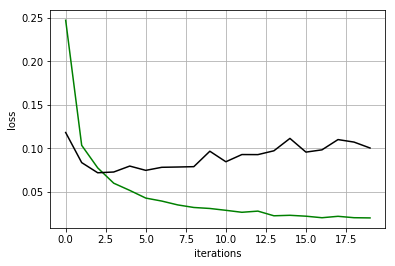

In [4]:
batch_size = 128 
nb_classes = 10
nb_epoch = 20

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#建立模型 使用Sequential（）
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

#打印模型
model.summary()

#训练与评估
#编译模型
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
model.fit(X_train, Y_train,
            batch_size=batch_size, nb_epoch=nb_epoch,
            verbose=1, 
            validation_data=(X_test, Y_test),
            callbacks=[history])

#模型评估
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')
